In [7]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rc
import matplotlib.pyplot as plt


rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False  

In [8]:
df = pd.read_csv('생성데이터/purchase_유지_연도포함.csv', index_col = 0)
df.head()

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT
0,17218,B,44,8664000,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,20,2420
1,11303,B,44,8664007,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,13,2400
2,13210,B,48,8919520,식품/생활,식품,탄산음료,사이다,일용품,20150921,2015,3,9,19,5250
3,13823,B,12,6956422,식품/생활,식품,탄산음료,사이다,일용품,20140813,2014,3,8,18,2250
4,18970,B,12,6957156,식품/생활,식품,탄산음료,사이다,일용품,20140831,2014,3,8,22,4900


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28255868 entries, 0 to 28593029
Data columns (total 15 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   CUSTNO    int64 
 1   ASSO      object
 2   STCODE    int64 
 3   RNO       int64 
 4   BBCL      object
 5   BCL       object
 6   MCL       object
 7   SCL       object
 8   TYPE      object
 9   PURDATE   int64 
 10  PURYEAR   int64 
 11  QUARTER   int64 
 12  PURMONTH  int64 
 13  PURHOUR   int64 
 14  PURAMT    int64 
dtypes: int64(9), object(6)
memory usage: 3.4+ GB


# RFM 확인

# 1. year 확인(RECENTLY) 

In [42]:
df_year = pd.pivot_table(df,
                        values = 'PURDATE',
                        index = 'CUSTNO',
                        aggfunc = ['max', 'count'])
df_year

,max,count
,PURDATE,PURDATE
CUSTNO,,
1,20151230,1057
2,20151230,1116
3,20151228,1191
4,20151231,930
6,20151231,1593
...,...,...
19333,20151230,824
19334,20151221,1964


In [43]:
df_year.columns = ['max_PURDATE', 'count_PURDATE']

In [44]:
df_year.max_PURDATE.value_counts()

20151231    8957
20151230    3646
20151229    1972
20151228    1122
20151226     660
            ... 
20151008       1
20151013       1
20151021       1
20151026       1
20151010       1
Name: max_PURDATE, Length: 77, dtype: int64

In [45]:
df_year.sort_values('max_PURDATE')

,max_PURDATE,count_PURDATE
CUSTNO,,
19193,20151003,38
14626,20151003,120
7957,20151004,841
17599,20151004,617
15932,20151008,505
...,...,...
5155,20151231,806
5154,20151231,2102
12293,20151231,1370


In [46]:
df_year.isnull().sum().sum()

0

가장 최근일 2015년 10월 3일 ~ 2015년 12월 31일 까지있음 (12월이 가장 많음)

-> R : 15년 12월 20일 구매했는지 (했으면 1, 안했으면 0)

In [63]:
df_year['max_PURDATE'].mean()

20151228.13664794

In [47]:
def recent(x):
    if x >= 20151220: y = 1
    else: y = 0
    return y

df_year['recent_purdate'] = df_year['max_PURDATE'].apply(lambda x : recent(x))
df_year

,max_PURDATE,count_PURDATE,recent_purdate
CUSTNO,,,
1,20151230,1057,1
2,20151230,1116,1
3,20151228,1191,1
4,20151231,930,1
6,20151231,1593,1
...,...,...,...
19333,20151230,824,1
19334,20151221,1964,1
19335,20151231,1873,1


In [48]:
df_year['recent_purdate'].value_counts()

1    18251
0      615
Name: recent_purdate, dtype: int64

# 2. 빈도수 확인(FREQUANCY) 

In [50]:
df_year['count_PURDATE'].value_counts().sort_values

<bound method Series.sort_values of 727     24
816     23
854     21
1490    20
724     20
        ..
2910     1
3442     1
2759     1
1932     1
189      1
Name: count_PURDATE, Length: 3290, dtype: int64>

In [51]:
df_year.sort_values('count_PURDATE')

,max_PURDATE,count_PURDATE,recent_purdate
CUSTNO,,,
18154,20151118,26,0
2975,20151125,32,0
11648,20151219,35,0
19193,20151003,38,0
15422,20151218,45,0
...,...,...,...
16747,20151231,6489,1
19187,20151230,6501,1
13148,20151231,6731,1


<AxesSubplot:xlabel='count_PURDATE', ylabel='Count'>

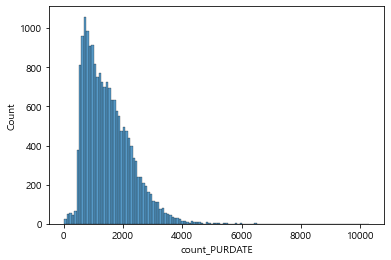

In [52]:
sns.histplot(df_year['count_PURDATE'])

In [62]:
df_year['count_PURDATE'].mean()

1497.713770804622

#### -> 로그변환...???

In [53]:
# 1500번 이상이면 1, 아니면 0
def frequancy(x):
    if x >= 1500: y = 1
    else: y = 0
    return y

df_year['frequancy'] = df_year['count_PURDATE'].apply(lambda x : frequancy(x))
df_year

,max_PURDATE,count_PURDATE,recent_purdate,frequancy
CUSTNO,,,,
1,20151230,1057,1,0
2,20151230,1116,1,0
3,20151228,1191,1,0
4,20151231,930,1,0
6,20151231,1593,1,1
...,...,...,...,...
19333,20151230,824,1,0
19334,20151221,1964,1,1
19335,20151231,1873,1,1


In [55]:
df_year['frequancy'].value_counts()

0    10707
1     8159
Name: frequancy, dtype: int64

# 3. 총 매출액(TOTAL ACCOUNT)

In [56]:
df_account = pd.pivot_table(df,
                        values = 'PURAMT',
                        index = 'CUSTNO',
                        aggfunc = ['max', 'sum'])
df_account

,max,sum
,PURAMT,PURAMT
CUSTNO,,
1,4014000,85042550
2,2856650,99880760
3,80000,3165167
4,372400,16693810
6,630000,24506417
...,...,...
19333,43000,4737498
19334,450000,12353531


In [57]:
df_account.columns = ['max_PURAMT', 'sum_PURAMT']
df_account

,max_PURAMT,sum_PURAMT
CUSTNO,,
1,4014000,85042550
2,2856650,99880760
3,80000,3165167
4,372400,16693810
6,630000,24506417
...,...,...
19333,43000,4737498
19334,450000,12353531
19335,684800,16700479


<AxesSubplot:xlabel='sum_PURAMT', ylabel='Count'>

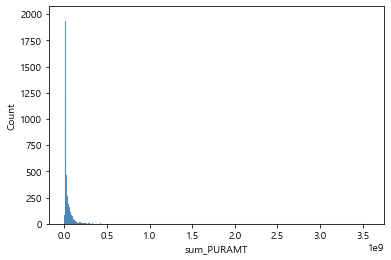

In [58]:
sns.histplot(df_account['sum_PURAMT'])

In [59]:
df_account.sort_values('sum_PURAMT')

,max_PURAMT,sum_PURAMT
CUSTNO,,
8081,30000,425750
18033,38500,484280
16678,82800,576510
1074,67200,668883
13338,113000,679620
...,...,...
6207,15920000,1721008092
16406,20115540,1881644780
7957,48112000,2134908726


In [61]:
df_account['sum_PURAMT'].mean()

35430145.58454362

In [66]:
# 35430145원 이상이면 1, 아니면 0
def moment(x):
    if x >= 35430145: y = 1
    else: y = 0
    return y

df_account['sum_moment'] = df_account['sum_PURAMT'].apply(lambda x : moment(x))
df_account

,max_PURAMT,sum_PURAMT,sum_moment
CUSTNO,,,
1,4014000,85042550,1
2,2856650,99880760,1
3,80000,3165167,0
4,372400,16693810,0
6,630000,24506417,0
...,...,...,...
19333,43000,4737498,0
19334,450000,12353531,0
19335,684800,16700479,0


In [67]:
df_account['sum_moment'].value_counts()

0    13617
1     5249
Name: sum_moment, dtype: int64

In [68]:
df_account.index

Int64Index([    1,     2,     3,     4,     6,     7,     8,     9,    10,
               11,
            ...
            19328, 19329, 19330, 19331, 19332, 19333, 19334, 19335, 19336,
            19337],
           dtype='int64', name='CUSTNO', length=18866)

In [70]:
df_year.columns

Index(['max_PURDATE', 'count_PURDATE', 'recent_purdate', 'frequancy'], dtype='object')

# total 로 넣고 돌려보기

In [71]:
df_total = df_year[['recent_purdate', 'frequancy']]
df_total['momently'] = df_account['sum_moment']
df_total

,recent_purdate,frequancy,momently
CUSTNO,,,
1,1,0,1
2,1,0,1
3,1,0,0
4,1,0,0
6,1,1,0
...,...,...,...
19333,1,0,0
19334,1,1,0
19335,1,1,0


In [72]:
df_total.to_csv('RFM_JY.csv')

In [74]:
total_ori = pd.read_csv('생성데이터/전체_카테고리_분기별_군집화.csv', index_col = 0)
total_ori

,가구인테리어_잡화_고가_clust_ids,가구인테리어_잡화_중가_clust_ids,가구인테리어_잡화_저가_clust_ids,가전_레저취미_멀티샵_고가_clust_ids,가전_레저취미_멀티샵_중가_clust_ids,가전_레저취미_멀티샵_저가_clust_ids,교육문화_아동_고가_clust_ids,교육문화_아동_중가_clust_ids,교육문화_아동_저가_clust_ids,식품_생활_고가_clust_ids,식품_생활_중가_clust_ids,식품_생활_저가_clust_ids,의류_이미용_고가_clust_ids,의류_이미용_중가_clust_ids,의류_이미용_저가_clust_ids,침구_주방_고가_clust_ids,침구_주방_중가_clust_ids,침구_주방_저가_clust_ids,전체_clust_ids
CUSTNO,,,,,,,,,,,,,,,,,,,
1,3,2,0,4,1,3,0,0,0,2,5,1,2,3,5,1,5,4,5
2,4,5,1,3,4,0,0,4,0,5,5,1,1,3,4,3,3,1,1
3,1,0,3,0,4,5,0,0,0,5,3,2,0,3,0,0,1,2,4
4,1,4,3,0,4,1,0,0,3,0,2,1,3,3,4,1,5,4,4
6,2,4,1,0,4,3,0,0,1,3,2,3,3,3,5,4,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,1,0,4,0,4,3,0,0,0,2,1,0,0,3,0,0,1,1,3
19334,1,0,3,0,4,0,5,1,2,2,2,1,0,3,0,0,1,4,3
19335,1,4,3,0,0,0,2,0,0,0,2,0,5,2,2,0,0,0,4


In [76]:
total_ = pd.concat([df_total, total_ori], axis=1)

In [77]:
total_ 

,recent_purdate,frequancy,momently,가구인테리어_잡화_고가_clust_ids,가구인테리어_잡화_중가_clust_ids,가구인테리어_잡화_저가_clust_ids,가전_레저취미_멀티샵_고가_clust_ids,가전_레저취미_멀티샵_중가_clust_ids,가전_레저취미_멀티샵_저가_clust_ids,교육문화_아동_고가_clust_ids,...,식품_생활_고가_clust_ids,식품_생활_중가_clust_ids,식품_생활_저가_clust_ids,의류_이미용_고가_clust_ids,의류_이미용_중가_clust_ids,의류_이미용_저가_clust_ids,침구_주방_고가_clust_ids,침구_주방_중가_clust_ids,침구_주방_저가_clust_ids,전체_clust_ids
CUSTNO,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,3,2,0,4,1,3,0,...,2,5,1,2,3,5,1,5,4,5
2,1,0,1,4,5,1,3,4,0,0,...,5,5,1,1,3,4,3,3,1,1
3,1,0,0,1,0,3,0,4,5,0,...,5,3,2,0,3,0,0,1,2,4
4,1,0,0,1,4,3,0,4,1,0,...,0,2,1,3,3,4,1,5,4,4
6,1,1,0,2,4,1,0,4,3,0,...,3,2,3,3,3,5,4,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,1,0,0,1,0,4,0,4,3,0,...,2,1,0,0,3,0,0,1,1,3
19334,1,1,0,1,0,3,0,4,0,5,...,2,2,1,0,3,0,0,1,4,3
19335,1,1,0,1,4,3,0,0,0,2,...,0,2,0,5,2,2,0,0,0,4


## 상관관계확인

<AxesSubplot:>

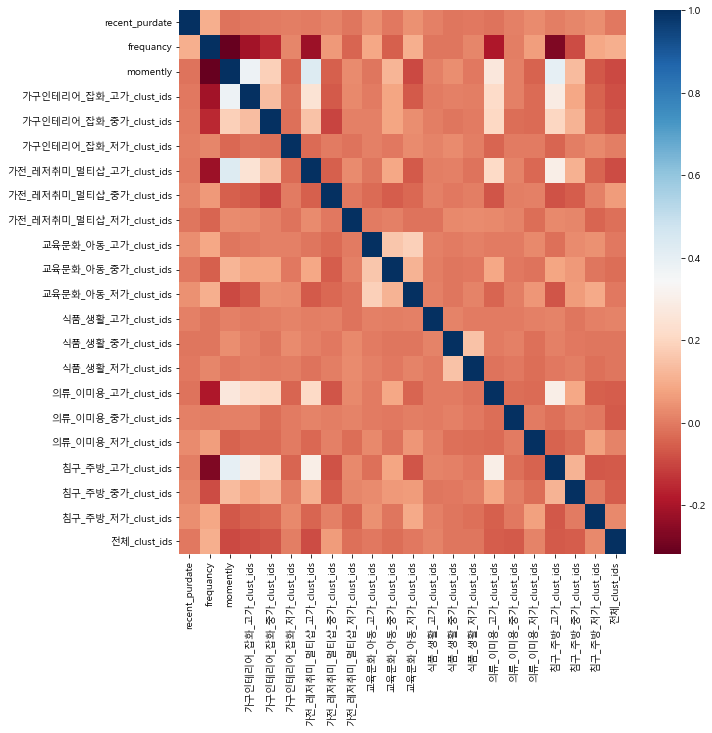

In [78]:
plt.figure(figsize=(10,10))
corr = total_.corr()
# print(corr)
sns.heatmap(corr, cmap='RdBu')

In [79]:
total_.corr()

,recent_purdate,frequancy,momently,가구인테리어_잡화_고가_clust_ids,가구인테리어_잡화_중가_clust_ids,가구인테리어_잡화_저가_clust_ids,가전_레저취미_멀티샵_고가_clust_ids,가전_레저취미_멀티샵_중가_clust_ids,가전_레저취미_멀티샵_저가_clust_ids,교육문화_아동_고가_clust_ids,...,식품_생활_고가_clust_ids,식품_생활_중가_clust_ids,식품_생활_저가_clust_ids,의류_이미용_고가_clust_ids,의류_이미용_중가_clust_ids,의류_이미용_저가_clust_ids,침구_주방_고가_clust_ids,침구_주방_중가_clust_ids,침구_주방_저가_clust_ids,전체_clust_ids
recent_purdate,1.000000,0.099392,-0.018578,-0.008563,0.001271,0.003486,0.000284,0.013450,-0.012343,0.032665,...,0.007713,-0.009736,-0.004079,-0.014725,0.006780,0.032250,0.002079,0.017688,0.032511,-0.004536
frequancy,0.099392,1.000000,-0.317551,-0.211216,-0.153054,0.018003,-0.223342,0.055684,-0.042139,0.085193,...,-0.013498,-0.009054,0.017781,-0.192796,0.005008,0.064947,-0.275256,-0.086255,0.084020,0.103063
momently,-0.018578,-0.317551,1.000000,0.376309,0.181757,-0.036667,0.433276,-0.051711,0.030308,-0.009268,...,0.008982,0.034847,-0.005725,0.264826,0.008208,-0.046745,0.400058,0.131762,-0.069311,-0.095436
가구인테리어_잡화_고가_clust_ids,-0.008563,-0.211216,0.376309,1.000000,0.140446,-0.018973,0.245940,-0.062799,0.023565,-0.000498,...,-0.003118,0.011362,0.004249,0.216348,0.008570,-0.034394,0.287270,0.087929,-0.047696,-0.085564
가구인테리어_잡화_중가_clust_ids,0.001271,-0.153054,0.181757,0.140446,1.000000,-0.022217,0.148982,-0.105412,0.008711,0.008820,...,0.006196,-0.009491,0.000273,0.206984,-0.028344,-0.034001,0.198624,0.113145,-0.038498,-0.073826
가구인테리어_잡화_저가_clust_ids,0.003486,0.018003,-0.036667,-0.018973,-0.022217,1.000000,-0.029596,-0.002062,-0.014045,0.007292,...,0.015806,0.028942,0.003190,-0.041910,-0.003328,0.001305,-0.042394,0.004168,0.025953,0.005768
가전_레저취미_멀티샵_고가_clust_ids,0.000284,-0.223342,0.433276,0.245940,0.148982,-0.029596,1.000000,-0.053511,0.029353,-0.012022,...,0.003919,0.009801,-0.016883,0.212489,0.016934,-0.036740,0.299380,0.105872,-0.043803,-0.087795
가전_레저취미_멀티샵_중가_clust_ids,0.013450,0.055684,-0.051711,-0.062799,-0.105412,-0.002062,-0.053511,1.000000,-0.008025,-0.029473,...,0.006767,-0.007391,0.005119,-0.074680,0.002534,0.011413,-0.079882,-0.060171,0.008125,0.058345
가전_레저취미_멀티샵_저가_clust_ids,-0.012343,-0.042139,0.030308,0.023565,0.008711,-0.014045,0.029353,-0.008025,1.000000,0.001218,...,-0.017985,0.026110,0.027914,0.023422,0.014953,-0.028511,0.026151,0.018735,-0.042884,-0.020585
교육문화_아동_고가_clust_ids,0.032665,0.085193,-0.009268,-0.000498,0.008820,0.007292,-0.012022,-0.029473,0.001218,1.000000,...,0.009573,0.000146,0.007628,0.000468,-0.001221,0.025090,-0.023548,0.030931,0.042458,-0.007089


## 모델 학습

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

def get_clf_eval(y_test,pred,pred_proba):
    accuracy = accuracy_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    auc = roc_auc_score(y_test,pred_proba)  
    # ROC-AUC print 추가
    print(f'정확도: {accuracy}, F1: {f1}, AUC:{auc}')
    
def get_model_train_eval(models, ftr_train=None, ftr_test=None, 
                         tgt_train=None, tgt_test=None):
    for model in models:
        print(model)
        model.fit(ftr_train,tgt_train)
        pred=model.predict(ftr_test)
        pred_proba=model.predict_proba(ftr_test)[:,1]
        get_clf_eval(tgt_test,pred,pred_proba)

x = total_.drop('전체_clust_ids', axis = 1)
y = total_['전체_clust_ids']

# 학습/테스트용 분리
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 11)

# 모델리스트
dt_clf = DecisionTreeClassifier()
lr_clf = LogisticRegression()
# lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, 
#                          boost_from_average=False)

In [89]:
model_li = [dt_clf, lr_clf]
get_model_train_eval(model_li, ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)

DecisionTreeClassifier()


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].